In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
def load_and_preprocess_data():
    (trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))

    trainY_cat = tf.keras.utils.to_categorical(trainY)
    testY_cat = tf.keras.utils.to_categorical(testY)

    train_norm = trainX.astype('float32') / 255.0
    test_norm = testX.astype('float32') / 255.0

    return train_norm, trainY_cat, test_norm, testY_cat

In [3]:
def create_cnn_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same', name='conv-layer-1'),
        tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-1'),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', name='conv-layer-2'),
        tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-2'),
        tf.keras.layers.GlobalAveragePooling2D(name='pooling-layer-3'),
        tf.keras.layers.Dense(10, activation="softmax", name="output-layer")
    ])

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [4]:
def train_model(model, trainX, trainY_cat, testX, testY_cat, epochs=10):
    history = model.fit(trainX, trainY_cat, epochs=epochs, validation_data=(testX, testY_cat))
    return history

In [5]:
def evaluate_model(model, testX, testY_cat):
    accuracy = model.evaluate(testX, testY_cat)[1]

    predictions = model.predict(testX)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(testY_cat, axis=1)

    classification_report_str = metrics.classification_report(true_labels, predicted_labels)
    confusion_matrix_arr = metrics.confusion_matrix(true_labels, predicted_labels)

    return accuracy, classification_report_str, confusion_matrix_arr

In [6]:
def visualize_random_predictions(model, testX, testY_cat, class_names):
    images = []
    labels = []
    random_indices = random.sample(range(len(testX)), 10)
    
    for idx in random_indices:
        images.append(testX[idx])
        labels.append(testY_cat[idx])

    images = np.array(images)
    labels = np.array(labels)

    fig = plt.figure(figsize=(20, 8))
    rows, cols = 2, 5
    x = 1

    for image, label in zip(images, labels):
        fig.add_subplot(rows, cols, x)
        prediction = model.predict(tf.expand_dims(image, axis=0))
        predicted_label = class_names[tf.argmax(prediction.flatten())]
        true_label = class_names[tf.argmax(label)]
        plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
        plt.imshow(image/255.)
        plt.axis("off")
        x += 1

In [7]:
trainX, trainY_cat, testX, testY_cat = load_and_preprocess_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

model = create_cnn_model()
history = train_model(model, trainX, trainY_cat, testX, testY_cat, epochs=10)
accuracy, classification_report_str, confusion_matrix_arr = evaluate_model(model, testX, testY_cat)


4422102/4422102 [==============================] - 1s 0us/step


Epoch 1/10


1875/1875 [==============================] - 15s 8ms/step - loss: 1.2275 - accuracy: 0.5604 - val_loss: 0.9179 - val_accuracy: 0.6811
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.8417 - accuracy: 0.7069 - val_loss: 0.7999 - val_accuracy: 0.7316
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7567 - accuracy: 0.7371 - val_loss: 0.7501 - val_accuracy: 0.7235
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7009 - accuracy: 0.7578 - val_loss: 0.6890 - val_accuracy: 0.7564
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6599 - accuracy: 0.7692 - val_loss: 0.6575 - val_accuracy: 0.7607
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6349 - accuracy: 0.7766 - val_loss: 0.6314 - val_accuracy: 0.7787
Epoch 7/10
1875/1875 [==============================] - 16s 8ms

1/1 [==============================] - 0s 31ms/step


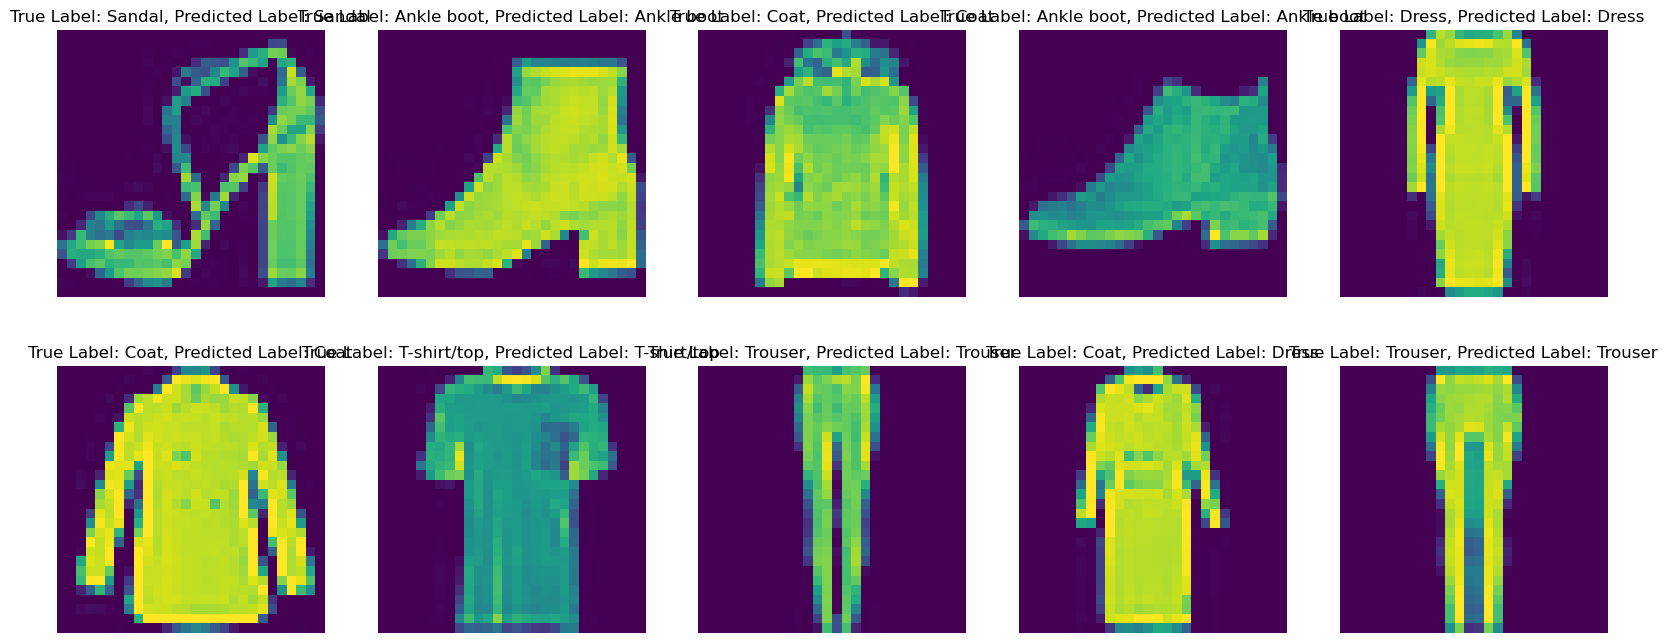

In [8]:
visualize_random_predictions(model, testX, testY_cat, class_names)

In [9]:
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)
print("\nConfusion Matrix:\n", confusion_matrix_arr)

Accuracy: 0.7853

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.82      0.75      1000
           1       0.98      0.94      0.96      1000
           2       0.52      0.83      0.64      1000
           3       0.79      0.77      0.78      1000
           4       0.77      0.41      0.54      1000
           5       0.95      0.92      0.93      1000
           6       0.53      0.36      0.43      1000
           7       0.92      0.88      0.90      1000
           8       0.89      0.97      0.93      1000
           9       0.89      0.95      0.92      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.79      0.78     10000


Confusion Matrix:
 [[822   0  36  68   6   3  32   0  32   1]
 [  2 939  13  36   5   0   4   0   1   0]
 [ 23   0 829   5  47   0  87   0   9   0]
 [ 90  10  27 768  13   2  74   0  16   0]
 [  9  